En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
- 📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.
    - Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
if 'eda' not in os.getcwd():
    os.chdir('eda')

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
plt.rcParams["figure.figsize"] = (10,8)

In [4]:
df = pd.read_csv("../datos/historico_tickets_limpio_pandas.csv", index_col = 0)
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:
    - Crear un subplot con dos gráficas.
    - En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
    - En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

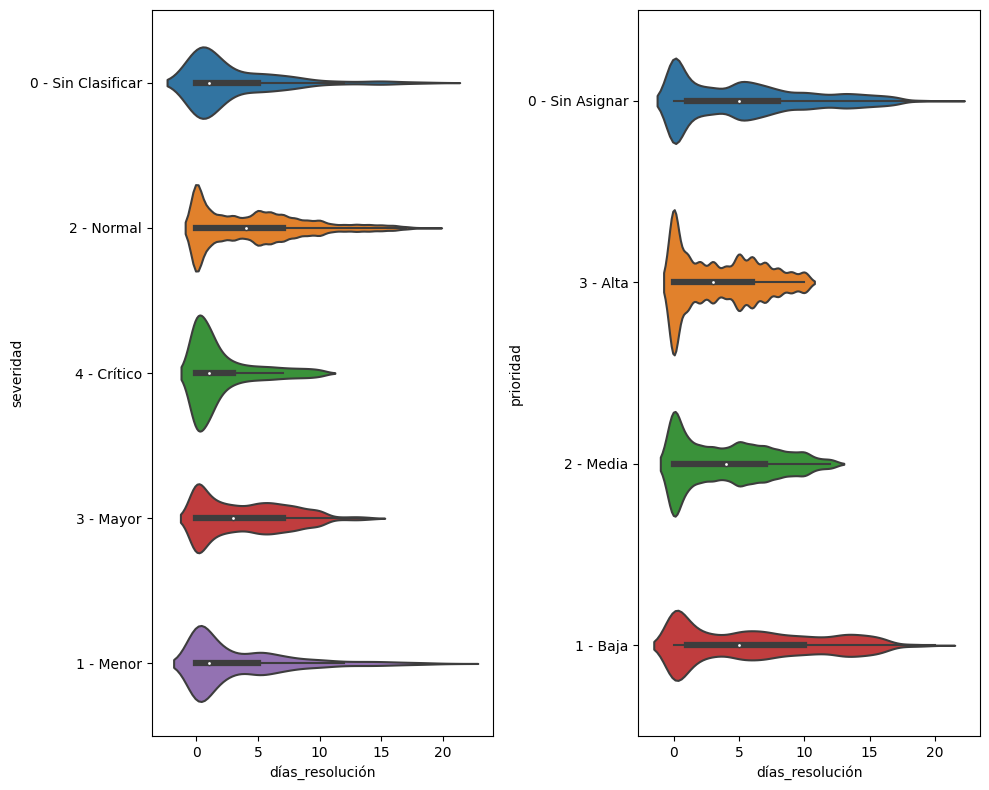

In [5]:
fig, axes = plt.subplots(1, 2)

sns.violinplot(x = 'días_resolución', y = 'severidad', data = df, ax = axes[0])
sns.violinplot(x = 'días_resolución', y = 'prioridad', data = df, ax = axes[1])

fig.tight_layout();

Como se aprecia en los gráficos, dejando a un lado las categorías sin clasificar/sin asignar, a menor severidad y prioridad mayor es el número de días necesarios para la resolución del ticket. Ambas variables (severidad y prioridad) tienen una correlación negativa con los días de resolución. Indirectamente, como cabría esperar, vemos que la severidad y la prioridad tienen una correlación positiva entre ellas.

- En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:  
    - Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".  
    - Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [6]:
df_categoria = df[(df['categoría'] == 'Acceso/Login') | (df['categoría'] == 'Software')]
df_categoria.head()
               

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
5,GDLEER-0142608095,2016-08-26,59,20,Software,Problema,2 - Normal,0 - Sin Asignar,1,1,2º semestre,2016,Agosto
6,GDLEER-0242564650,2016-07-13,1175,36,Software,Problema,2 - Normal,0 - Sin Asignar,2,1,2º semestre,2016,Julio


In [7]:
df_categoria['categoría']. unique()

array(['Acceso/Login', 'Software'], dtype=object)

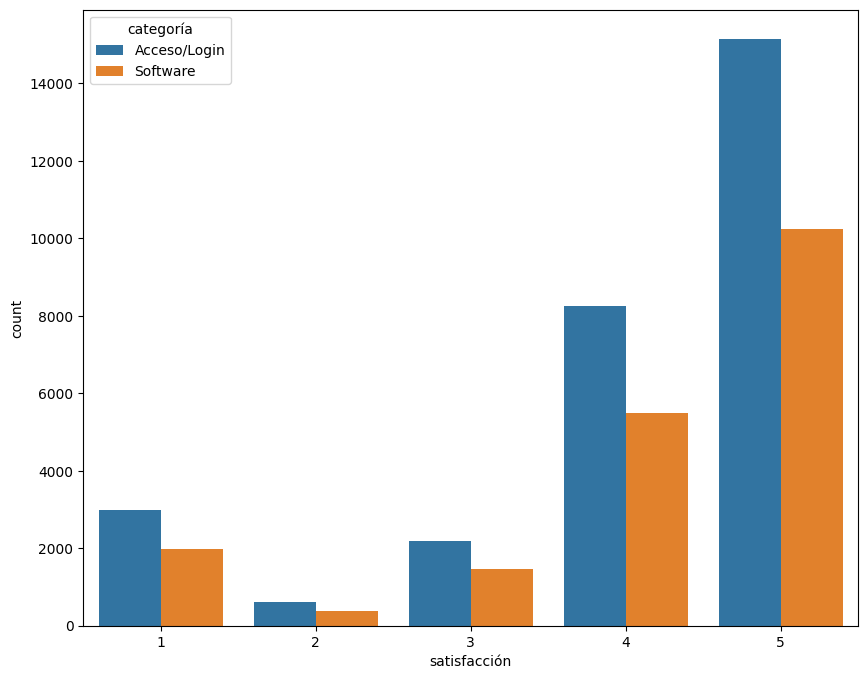

In [8]:
sns.countplot(x='satisfacción', data=df_categoria, hue='categoría');

En el gráfico de arriba se aprecia que en todos los niveles de satisfacción el tipo Acceso/Login tiene más tickets pero parece que la proporción se mantiene así que se podría estimar que el tipo de tickect no afecta a la satisfacción, al menos entre estas dos categorías. Lo comprobamos mejor a continuación obteniendo la gráfica con la media de satisfacción de cada categoría, que como se puede ver es muy similar

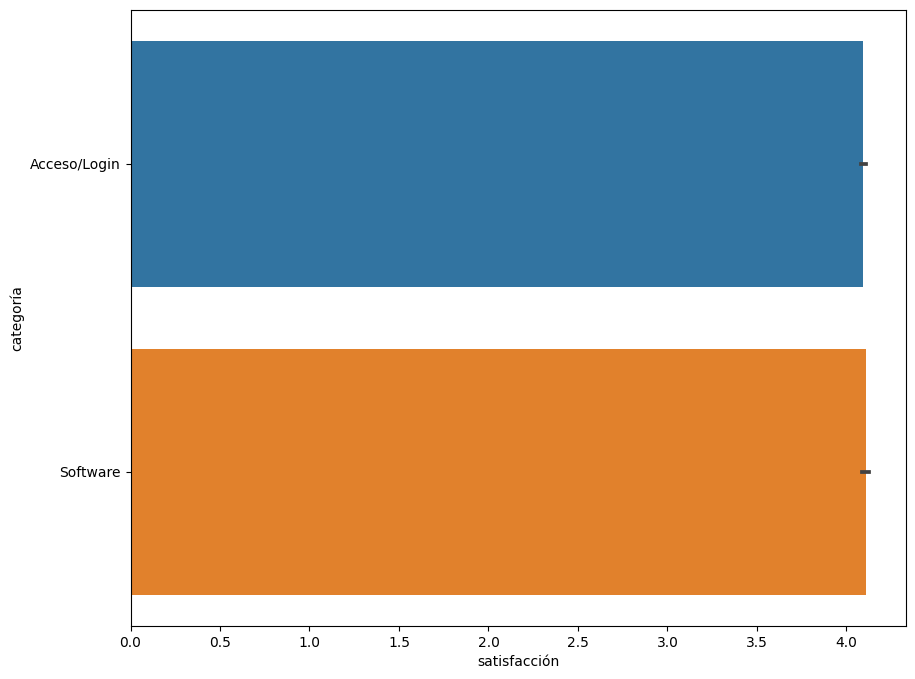

In [9]:
sns.barplot(x='satisfacción', y='categoría', data=df_categoria);

In [10]:
# lo comprobamos también de forma numérica
df_cat_mean = df_categoria.groupby('categoría')['satisfacción'].mean().reset_index()
df_cat_mean

,categoría,satisfacción
0,Acceso/Login,4.094874
1,Software,4.106841


Numéricamente hemos comprobado que efectivamente no hay diferencias apreciables en los porcentajes de cada nivel de satisfacción entre ambas categorías de tickets.

- En la tercera gráfica contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:  
a. En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
    - Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.
    - Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

In [11]:
# empleados ordenados por aquellos con más tickets
df_empl = df.groupby('id_empleado')['id_ticket'].count().reset_index().sort_values(by= 'id_ticket', ascending=False)
df_empl.head()

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69


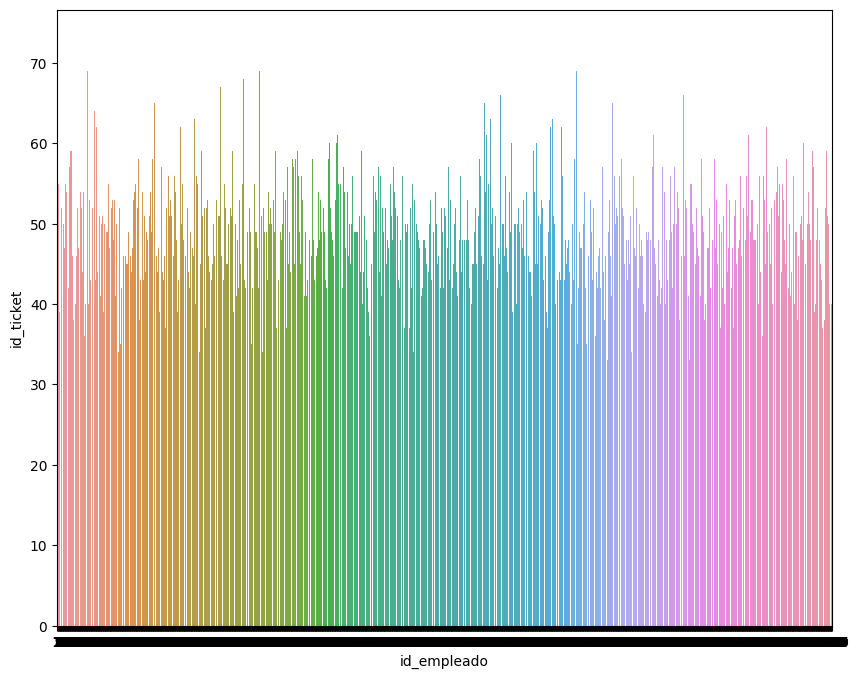

In [18]:
# este sería el gráfico pero no vemos gran cosa, aparte de que hay bastantes diferencias entre el número de tickets que gestionan unos empleados y otros
sns.barplot(x='id_empleado', y='id_ticket', data=df_empl);

b. En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
        - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
        - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
        - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

In [13]:
# 10 empleados con más tickets
df_empl10t = df_empl.head(10)
df_empl10t

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
1340,1341,69
441,442,68
325,326,68
481,482,68
1447,1448,68


In [14]:
# 10 empleados con menos tickets
df_empl10d = df_empl.tail(10)
df_empl10d

,id_empleado,id_ticket
1040,1041,33
1791,1792,32
606,607,32
685,686,32
1383,1384,32
1617,1618,31
71,72,31
1194,1195,29
98,99,27
792,793,26


In [15]:
# 10 agentes con más tickets y 10 agentes con menos tickets
df_empl10td = pd.concat([df_empl10t, df_empl10d], axis=0)
df_empl10td

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
1340,1341,69
441,442,68
325,326,68
481,482,68
1447,1448,68


In [16]:
# agentes que tardan más en solucionar los tickets
df_empl_res = df.groupby('id_empleado')['días_resolución'].mean().reset_index().sort_values(by= 'días_resolución', ascending=False).head(10)
df_empl_res

,id_empleado,días_resolución
1368,1369,7.659091
203,204,7.513514
1810,1811,7.425000
1545,1546,7.414634
910,911,7.340909
690,691,7.326531
896,897,7.324324
1991,1992,7.300000
1468,1469,7.300000
1756,1757,7.298246


In [ ]:
fig2, axes2 = plt.subplots(3, 1)

sns.barplot(x='id_empleado', y= 'id_ticket', data=df_empl, ax=axes2[0])
#sns.countplot(x='id_empleado', data=df, order=df['id_empleado'].value_counts().iloc[:11].index, ax=axes2[0]) # 10 empleados con más tickets
#sns.barplot(x='id_empleado', y='días_resolución', data=df_empl_res, ax=axes2[1]) # 10 empleados con mayor media de días de resolución


fig.tight_layout();

c. En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:  
        📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.
        - Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.